<a href="https://colab.research.google.com/github/SanderSaska/MorfoloogiliseMuuttyybiAutomaatneTuvastaja/blob/main/Morfoloogilise_muutt%C3%BC%C3%BCbi_automaatne_tuvastamine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Colabi jaoks
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Lõputöö')

Mounted at /content/drive


In [3]:
!python --version

Python 3.10.12


In [4]:
%pip install estnltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.2/222.2 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.8 MB/s eta 0:00:00


In [77]:
# Importimised
import re
import time
import random
import csv
import nltk
import estnltk
import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict

## Analüüs, statistika, andmete kogumine

In [ ]:
# Ridade arv
with open('fs_lex.txt', 'r') as fs_lex:
  ridade_arv = 0
  for rida in fs_lex:
    ridade_arv += 1
  print(ridade_arv) # 73832

73832


#### Vanad

Erinevate pikkustega järjendid

In [ ]:
# Muutujad
sõnade_regex = r'\|([^\s!]+)(?=\s|!)' # ChatGPT abiga leitud
sõnaliigi_regex = r'\\(\w{1,5})\\'
muuttüübi_regex = r'\.(\d{1,2})'
sõnad = []
sõnaliigid = []
muuttüübid = []

with open('fs_lex.txt', 'r') as fs_lex:
# Andmete kättesaamine
  fs_lex.readline()
  for rida in fs_lex:
      #time.sleep(1)
      #display(rida)
      sõna = re.findall(sõnade_regex, rida)
      sõnaliik = re.findall(sõnaliigi_regex, rida)
      muuttüüp = re.findall(muuttüübi_regex, rida)
      if sõnaliik:
        if sõnaliik[0][0] == "B":
          sõnaliigid.append("A")
        else:
          sõnaliigid.append([sõnaliik[0][0]])
      else:
        print(rida)
      if muuttüüp:
        muuttüübid.append(muuttüüp)
      if sõna:
        puhastatud = re.sub(r'[^a-zA-Z0-9-\/\\=ÕÄÖÜŠŽõäöüšž]', '', sõna[0])
        if '=' in puhastatud: # Mitmesõnaline
          puhastatud = puhastatud.replace('=', ' ')
        if puhastatud[0].isupper():
          puhastatud = puhastatud[0] + puhastatud[1:].lower()
        else:
          puhastatud = puhastatud.lower()
        sõnad.append([puhastatud])
      #print(puhastatud, sõnaliik, muuttüüp)

lisav:0919|**<eel_k<eet[MA <eel_k<eet[A <eel_keeda[B <eel_keede[TUD <eel_k<eet[MATA <eel_k<eet[EV <eel_k<eet[IS <eel_k<eet[KU <eel_keeda[ME <eel_keede[TAKSE <eel_k<eet[SIN <eel_k<eet[SIME <eel_k<eet[NUD !V.34!

vvsv:0093|**-- -- -- -- -- -- -- -- -- -- -- -- --  $neg$<ei 

vvsv:0093|**-- -- -- -- -- -- -- -- -- -- -- -- --  $neg o$ära $neg ge$är[GE $neg gem$är[GEM $neg gu$är[GU $neg me$är[ME 

lisav:0919|**s<un]d_l<iit[MA s<un]d_l<iit[A s<un]d_liida[B s<un]d_liide[TUD s<un]d_l<iit[MATA s<un]d_l<iit[EV s<un]d_l<iit[IS s<un]d_l<iit[KU s<un]d_liida[ME s<un]d_liide[TAKSE s<un]d_l<iit[SIN s<un]d_l<iit[SIME s<un]d_l<iit[NUD !V.34!



In [ ]:
print(f"Ridade arv: {ridade_arv}")
print(f"Sõnaliike kokku: {len(sõnaliigid)}")
print(sõnaliigid[:20])
print(f"Muuttüüpe kokku: {len(muuttüübid)}")
print(muuttüübid[:20])
print(f"Sõnu kokku: {len(sõnad)}")
print(sõnad[:30])
print(sõnad[-30:])

Ridade arv: 73832
Sõnaliike kokku: 73827
[['S'], ['S'], ['S'], ['S'], ['S'], ['H'], ['S'], ['S'], ['S'], ['A'], ['S'], ['S'], ['S'], ['H'], ['H'], ['H'], ['S'], ['S'], ['A'], ['S']]
Muuttüüpe kokku: 65768
[['22'], ['22'], ['22'], ['22'], ['6'], ['2'], ['2'], ['2'], ['22'], ['25'], ['2'], ['11', '9'], ['18'], ['2'], ['2'], ['2'], ['22'], ['22'], ['6'], ['2']]
Sõnu kokku: 73831
[['1/16-finaal'], ['1/2-finaal'], ['1/4-finaal'], ['1/8-finaal'], ['aabe'], ['Aabel'], ['aabits'], ['aabitsajünger'], ['aabitsajüts'], ['aabitsalik'], ['aabitsaraamat'], ['aabitsatarkus'], ['aabitsatõde'], ['Aabram'], ['Aachen'], ['Aadam'], ['aadamaõun'], ['aadamaülikond'], ['aadamaülikonnas'], ['aade'], ['aadel'], ['aadeldama'], ['aadelkond'], ['aader'], ['aadeteta'], ['aadlidaam'], ['aadlik'], ['aadlimees'], ['aadliseisus'], ['aadliseisusesse tõstma']]
[['üürikorter'], ['üürileandja'], ['üürile andma'], ['üürileping'], ['üürile võtma'], ['üüriline'], ['üürima'], ['üüriraha'], ['üüritoake'], ['üürivõlglane'], ['ü

Sama pikkusega järjendid (hea `.csv` faili salvestamiseks)

In [ ]:
# Muutujad
sõnade_regex = r'\|([^\s!]+)(?=\s|!)' # ChatGPT abiga leitud
sõnaliigi_regex = r'\\(\w{1,5})\\'
muuttüübi_regex = r'\.(\d{1,2})'
sõnad = []
sõnaliigid = []
muuttüübid = []

with open('fs_lex.txt', 'r') as fs_lex:
# Andmete kättesaamine
  fs_lex.readline()
  for rida in fs_lex:
      #time.sleep(1)
      #display(rida)
      sõna = re.findall(sõnade_regex, rida)
      sõnaliik = re.findall(sõnaliigi_regex, rida)
      muuttüüp = re.findall(muuttüübi_regex, rida)
      if sõnaliik:
        if sõnaliik[0][0] == "B":
          sõnaliigid.append("A")
        else:
          if len(sõnaliik) > 1:
            #print(sõnaliik)
            if sõnaliik[0][0] != sõnaliik[1][0]:
              sõnaliigid.append([sõnaliik[0][0], sõnaliik[1][0]])
          else:
            sõnaliigid.append([sõnaliik[0][0]])
      else:
        #print(rida)
        # Kaks rida on kahtlased, vaata eelmise realt print(rida)
        if 'vvsv' in rida:
          continue
        # Ülejäänud kaks on tegusõnad
        else:
          sõnaliigid.append(["V"])
      muuttüübid.append(muuttüüp)
      puhastatud = re.sub(r'[^a-zA-Z0-9-\/\\=ÕÄÖÜŠŽõäöüšž]', '', sõna[0])
      if '=' in puhastatud: # Mitmesõnaline
        puhastatud = puhastatud.replace('=', ' ')
      if puhastatud[0].isupper():
        puhastatud = puhastatud[0] + puhastatud[1:].lower()
      else:
        puhastatud = puhastatud.lower()
      sõnad.append([puhastatud])
      #print(puhastatud, sõnaliik, muuttüüp)

TypeError: expected string or bytes-like object

#### Täiendatud versioon

In [ ]:
sõnaliigi_regex = r'\\(\w{1,5})\\'
muuttüübi_regex = r'\.(\d{1,2})'
sõnad = []
sõnaliigid = []
muuttüübid = []
keelud = ['*', '$', '--']

with open('fs_lex.txt', 'r') as fs_lex:
# Andmete kättesaamine
  fs_lex.readline()
  for rida in fs_lex:
      #time.sleep(0.125)
      #display(rida)
      info = rida.split('|')[1].split('!')

      # Sõna kättesaamine
      sõnu = info[0].split(' ')
      for s in sõnu: # Võtab esimese seda esindavat muutevormi, mis on olemas
        if s:
          järgmine = False
          for keeld in keelud:
            if keeld in s:
              järgmine = True
              break
          if järgmine:
            #print(s)
            continue
          sõna = s
          break

      # Sõnaliigi kättesaamine
      sõnaliik = re.findall(sõnaliigi_regex, rida)
      if sõnaliik:
        for i in range(len(sõnaliik)):
          sõnaliik[i] = sõnaliik[i][0]
          if sõnaliik[i] == 'B':
            sõnaliik[i] = 'A'
        sõnaliigid.append(sõnaliik)
      else:
        #print(rida)
        # Sõnad "ei" ja "ära"
        if 'vvsv' in rida:
          sõnaliigid.append(["I"])
          for s in sõnu:
            if s not in keelud and s != '$neg':
              sõna = s.split('$')[-1]
              break
        # Ülejäänud kaks on tegusõnad
        else:
          sõnaliigid.append(["V"])

      # Muuttüübi kättesaamine
      muuttüüp = re.findall(muuttüübi_regex, rida)
      muuttüübid.append(muuttüüp)

      # Sõnade puhastamine
      puhastatud = re.sub(r'[\+\<\?\]\~\_\[\(\)\&\#\’\*\,]', '', sõna)
      if '=' in puhastatud: # Mitmesõnaline
        puhastatud = puhastatud.replace('=', ' ')

      if puhastatud[0].isupper():
        if '-' not in puhastatud:
          sõnasid = puhastatud.split()
          puhastatud = ""
          for s in sõnasid:
            if s[0].isupper():
              puhastatud += s[0] + s[1:].lower() + " "
            else:
              puhastatud += s + " "
        else:
          sõnasid = puhastatud.split("-")
          puhastatud = ""
          for s in sõnasid:
            if s[0].isupper():
              puhastatud += s[0] + s[1:].lower() + "-"
            else:
              puhastatud += s + " "
        puhastatud = puhastatud.strip("-")

      else:
        puhastatud = puhastatud.lower()

      sõnad.append([puhastatud])
      #print(puhastatud, sõnaliik, muuttüüp)

In [ ]:
# Testimine
puhastatud = re.sub(r'[^a-zA-Z0-9-\/\\=ÕÄÖÜŠŽõäöüšž]', '', 'And?orra=la=Vella')
if '=' in puhastatud: # Mitmesõnaline
  puhastatud = puhastatud.replace('=', ' ')

if puhastatud[0].isupper():
  if '-' not in puhastatud:
    sõnasid = puhastatud.split()
    print(sõnasid)
    puhastatud = ""
    for s in sõnasid:
      if s[0].isupper():
        puhastatud += s[0] + s[1:].lower() + " "
      else:
        puhastatud += s + " "
  else:
    sõnasid = puhastatud.split("-")
    print(sõnasid)
    puhastatud = ""
    for s in sõnasid:
      if s[0].isupper():
        puhastatud += s[0] + s[1:].lower() + "-"
      else:
        puhastatud += s + " "
  puhastatud = puhastatud.strip("-")

else:
  puhastatud = puhastatud.lower()

print(puhastatud)

['Andorra', 'la', 'Vella']
Andorra la Vella 


In [ ]:
print(f"Ridade arv: {ridade_arv}")
print(f"Sõnaliike kokku: {len(sõnaliigid)}")
print(sõnaliigid[:20])
print(f"Muuttüüpe kokku: {len(muuttüübid)}")
print(muuttüübid[:20])
print(f"Sõnu kokku: {len(sõnad)}")
print(sõnad[:30])
print(sõnad[-30:])

Ridade arv: 73832
Sõnaliike kokku: 73831
[['S'], ['S'], ['S'], ['S'], ['S'], ['H'], ['S'], ['S'], ['S'], ['A'], ['S'], ['S', 'S'], ['S'], ['H'], ['H'], ['H'], ['S'], ['S'], ['A'], ['S']]
Muuttüüpe kokku: 73831
[['22'], ['22'], ['22'], ['22'], ['6'], ['2'], ['2'], ['2'], ['22'], ['25'], ['2'], ['11', '9'], ['18'], ['2'], ['2'], ['2'], ['22'], ['22'], [], ['6']]
Sõnu kokku: 73831
[['1/16-finaal'], ['1/2-finaal'], ['1/4-finaal'], ['1/8-finaal'], ['aabe'], ['Aabel '], ['aabits'], ['aabitsajünger'], ['aabitsajüts'], ['aabitsalik'], ['aabitsaraamat'], ['aabitsatarkus'], ['aabitsatõde'], ['Aabram '], ['Aachen '], ['Aadam '], ['aadamaõun'], ['aadamaülikond'], ['aadamaülikonnas'], ['aade'], ['aadel'], ['aadeldama'], ['aadelkond'], ['aader'], ['aadeteta'], ['aadlidaam'], ['aadlik'], ['aadlimees'], ['aadliseisus'], ['aadliseisusesse tõsta']]
[['üürikorter'], ['üürileandja'], ['üürile anda'], ['üürileping'], ['üürile võtta'], ['üüriline'], ['üürima'], ['üüriraha'], ['üüritoake'], ['üürivõlglane'],

#### Erindite kontrollimine

In [ ]:
# Erindite jms kontrollimine, nt eelkeetma sõnaliigi kättesaamine
# TODO tegusõna muuttüüp == tegusõna muuttüüp koos
# TODO sidekriipsud kokku arvutada
i = 0
count = 0
for sõna, sõnaliik, muuttüüp in zip(sõnad, sõnaliigid, muuttüübid):
  i+=1
  #if i == 6354:
  #  print("Rida number 6354", end = " ")
  #  print(i, sõna, sõnaliik, muuttüüp)
  for m in muuttüüp:
    if int(m) == 0:
      count+=1
      print("0 muuttüübiga", end = " ")
      print(i, sõna, sõnaliik, muuttüüp)
print(count)

0 muuttüübiga 843 ['ajalehed-ajakirjad'] ['S'] ['0']
0 muuttüübiga 6702 ['eikeegi'] ['P'] ['0']
0 muuttüübiga 6717 ['eimiski'] ['P'] ['0']
0 muuttüübiga 7026 ['elamine-olemine'] ['S'] ['0']
0 muuttüübiga 7471 ['ematu-isatu'] ['S'] ['0']
0 muuttüübiga 7479 ['emb-kumb'] ['P'] ['0']
0 muuttüübiga 14958 ['ise'] ['P'] ['0']
0 muuttüübiga 14959 ['iseenese'] ['P'] ['0']
0 muuttüübiga 15187 ['istumine-astumine'] ['S'] ['0']
0 muuttüübiga 19951 ['keegi'] ['P'] ['0']
0 muuttüübiga 20529 ['kes'] ['P'] ['0']
0 muuttüübiga 20739 ['kibin-kabin'] ['S'] ['0']
0 muuttüübiga 20781 ['kigin-kägin'] ['S'] ['0']
0 muuttüübiga 20802 ['kihin-kahin'] ['S'] ['0']
0 muuttüübiga 21156 ['kilin-kolin'] ['S'] ['0']
0 muuttüübiga 21157 ['kilin-kõlin'] ['S'] ['0']
0 muuttüübiga 21272 ['kimpsud-kompsud'] ['S'] ['0']
0 muuttüübiga 21603 ['kirin-kärin'] ['S'] ['0']
0 muuttüübiga 22196 ['klibin-klobin'] ['S'] ['0']
0 muuttüübiga 24389 ['kopsud-maksad'] ['S'] ['0']
0 muuttüübiga 25880 ['kumbki'] ['P'] ['0']
0 muuttüübiga 2

Järgmine info on võetud [Leksikoni kirjeldusest](https://github.com/Filosoft/vabamorf/blob/master/doc/morfi_leksikoni_kirjeldus.md):

#### Lingvistiliselt sisukad sõnaliigid leksikonis on järgmised:
 * `A` omadussõna - algvõrre (adjektiiv - positiiv), nii käänduvad kui käändumatud, nt kallis või eht
 * `C` omadussõna - keskvõrre (adjektiiv - komparatiiv), nt laiem
 * `D` määrsõna (adverb), nt kõrvuti
 * `G` genitiivatribuut (käändumatu omadussõna), nt balti
 * `H` pärisnimi, nt Edgar
 * `I` hüüdsõna (interjektsioon), nt tere
 * `J` sidesõna (konjunktsioon), nt ja
 * `K` kaassõna (pre/postpositsioon), nt kaudu
 * `N` põhiarvsõna (kardinaalnumeraal), nt kaks
 * `O` järgarvsõna (ordinaalnumeraal), nt teine
 * `P` asesõna (pronoomen), nt see
 * `S` nimisõna (substantiiv), nt asi
 * `U` omadussõna - ülivõrre (adjektiiv - superlatiiv), nt pikim
 * `V` tegusõna (verb), nt lugema
 * `X` verbi juurde kuuluv sõna, millel eraldi sõnaliigi tähistus puudub, nt plehku

#### Morf. analüsaator väljastab algoritmiliselt analüüsitavatele tekstielementidele ka selliseid 2 liiki, mida sõnastikus ei esine:

* `Y` lühend, nt USA
* `Z` lausemärk, nt `-`, `/`, `...`

#### Sisemiselt kasutatakse veel järgmisi sõnaliike:

* `B` omadussõna, millest kesk- või ülivõrde moodustamine ei käi reeglipäraselt, nt. lahja
* `W` deverbaal, s.t. sõna on tuletatud verbist, nt. toitev, jooks; esineb alati koos liigiga A või S

#### Sõnaliigi väljal võib peale sõnaliigi olla ka mõni järgmine tunnus:

* `t` tabusõna (nt perse)
* `s` ainult spelleris lubatav üksiksõna (nt Aires, Janeiro)
* `e` ainult tesauruses sellisena omaette sõnana esitatav sõna (nt aukudega (=auklik))
* `m` liitsõna koosseisu mittesobiv sõna (nt viieaastane)
* `n` liitsõna lõppu mittesobiv sõna (nt abt, bai, utt)


#### Sõnaliigi sagedused

In [ ]:
# Sõnaliigi sagedused
#sõnaliigid_freq = nltk.probability.FreqDist(sõnaliik[0] for sõnaliik in sõnaliigid)
sõnaliigid_freq = defaultdict(lambda: 0)
for sõnaliik_list in sõnaliigid:
  if len(sõnaliik_list) == 1:
    sõnaliigid_freq[sõnaliik_list[0]] += 1
  else:
    sl = ""
    for i in range(len(sõnaliik_list)):
      item = sõnaliik_list[i]
      if i == len(sõnaliik_list) - 1:
        sl += item
      else:
        sl += item + ","
    sõnaliigid_freq[sl] += 1

sõnaliigid_freq = sorted(sõnaliigid_freq.items(), key=lambda item: item[1], reverse=True)
for item, freq in sõnaliigid_freq:
  print(f"{item}: {freq} ({round(freq / len(sõnaliigid) * 100, 3)}%)")

S: 37141 (50.305%)
V: 10655 (14.432%)
A: 9977 (13.513%)
D: 6419 (8.694%)
H: 3763 (5.097%)
S,S: 3406 (4.613%)
G: 584 (0.791%)
C: 414 (0.561%)
A,A: 357 (0.484%)
I: 338 (0.458%)
K: 201 (0.272%)
N: 105 (0.142%)
P: 90 (0.122%)
S,I: 73 (0.099%)
U: 70 (0.095%)
V,V: 69 (0.093%)
O: 48 (0.065%)
D,K: 41 (0.056%)
J: 23 (0.031%)
X: 21 (0.028%)
H,H: 14 (0.019%)
P,P: 12 (0.016%)
S,A: 5 (0.007%)
K,D: 3 (0.004%)
A,S: 2 (0.003%)


#### Muuttüüpide sagedused

Järgmine info on võetud [Leksikoni kirjeldusest](https://github.com/Filosoft/vabamorf/blob/master/doc/morfi_leksikoni_kirjeldus.md):

Muuttüüp on sama mis [Väikeses vormisõnastikus](https://www.eki.ee/teemad/tabel_tyybid.html): käändsõnadel 1-26 ja pöördsõnadel 27-38.

Koondtabel või täpsem [Väikese vormisõnastiku](https://www.eki.ee/teemad/tabel_tyybid.html) tabel

In [ ]:
# Muuttüübi sagedused
#muuttüübid_freq = nltk.probability.FreqDist(muuttüüp[0] for muuttüüp in muuttüübid) # NB! Võtab hetkel ainult esimese muuttüübi, kui sõnal on mitu

print("---Mitme muuttüübiga sõnades eraldatakse muuttüübid---\n")

muuttüübid_freq = defaultdict(lambda: 0)
# Eraldi kõik
for muuttüüp_list in muuttüübid:
  for item in muuttüüp_list:
    muuttüübid_freq[item] += 1 # Võtab eraldi mitme muuttüübiga

käändsõnad_freq = {}
pöördsõnad_freq = {}
tundmatu_freq = 0
for item, freq in muuttüübid_freq.items():
  if int(item) == 0:
    tundmatu_freq = freq
  elif int(item) <= 26:
    käändsõnad_freq[item] = freq
  else:
    pöördsõnad_freq[item] = freq

käändsõnad_freq = sorted(käändsõnad_freq.items(), key=lambda item: item[1], reverse=True)
pöördsõnad_freq = sorted(pöördsõnad_freq.items(), key=lambda item: item[1], reverse=True)

print("Käändsõnad")
for item, freq in käändsõnad_freq:
  print(f"{item}: {freq}")
print()
print("Pöördsõnad")
for item, freq in pöördsõnad_freq:
  print(f"{item}: {freq}")
print()
print("Muuttüüp 0:", tundmatu_freq)

---Mitme muuttüübiga sõnades eraldatakse muuttüübid---

Käändsõnad
22: 14142
2: 11447
11: 6352
12: 5203
1: 4640
9: 3048
16: 2722
10: 2002
17: 1721
25: 1514
26: 1256
6: 1063
19: 739
13: 531
7: 460
24: 399
18: 396
5: 257
23: 218
14: 184
20: 108
4: 106
21: 99
8: 79
15: 70
3: 33

Pöördsõnad
27: 5650
28: 2670
29: 722
36: 551
34: 463
30: 214
38: 169
37: 153
35: 112
31: 38
32: 37
33: 11

Muuttüüp 0: 54


In [ ]:
print("---Mitme muuttüübiga sõnadel on oma kategooria---\n")

muuttüübid_freq = defaultdict(lambda: 0)
# Mitme muuttüübid omas kategoorias
for muuttüüp_list in muuttüübid:
  if len(muuttüüp_list) == 1:
    muuttüübid_freq[str(muuttüüp_list[0])] += 1
  else:
    mttps = ""
    for i in range(len(muuttüüp_list)):
      item = muuttüüp_list[i]
      if i == len(muuttüüp_list) - 1:
        mttps += item
      else:
        mttps += item + ","
    muuttüübid_freq[mttps] += 1

muuttüübid_freq = sorted(muuttüübid_freq.items(), key=lambda item: item[1], reverse=True)

käändsõnad_freq = {}
pöördsõnad_freq = {}

for tüüp, freq in muuttüübid_freq:
  el = tüüp.split(",")
  #print(el, freq)
  if not el[0]:
    käändsõnad_freq['käändumatud'] = freq
  elif int(el[0]) == 0:
    tundmatu_freq = freq
  elif int(el[0]) <= 26:
    käändsõnad_freq[tüüp] = freq
  else:
    pöördsõnad_freq[tüüp] = freq

print("Käändsõnad")
for item, freq in käändsõnad_freq.items():
  print(f"{item}: {freq}")
print()
print("Pöördsõnad")
for item, freq in pöördsõnad_freq.items():
  print(f"{item}: {freq}")
print()
print("Muuttüüp 0:", tundmatu_freq)

---Mitme muuttüübiga sõnadel on oma kategooria---

Käändsõnad
22: 13941
2: 11260
käändumatud: 8063
1: 4640
12: 4286
11: 3890
16: 2722
11,9: 2462
17: 1721
25: 1514
26: 1256
10: 1085
6: 1063
12,10: 903
9: 586
19: 552
13: 531
7: 455
24: 399
18: 396
5: 227
23,22: 199
19,2: 187
14: 184
20: 108
4: 106
21: 99
8: 79
15: 70
3,5: 25
23: 19
10,12: 14
3: 8
5,7: 5
22,22: 1

Pöördsõnad
27: 5581
28: 2639
29: 722
36: 551
34: 463
30: 214
38: 169
37: 153
35: 112
31,27: 38
32: 37
28,27: 31
33: 11

Muuttüüp 0: 54


#### `.csv` faili salvestamine

In [ ]:
muuttüübi_0_algvormid = list()

In [ ]:
# Lemmad, muuttüüp (esialgu number, hiljem one-hot vektor vms.) .csv faili
veerud = ["Sõna", "Sõnaliik", "Muuttüüp"]
with open('muuttüübid_andmed.csv', 'w') as fail:
  csv_writer = csv.writer(fail)
  csv_writer.writerow(veerud)
  for sõna, sõnaliik, muuttüüp in zip(sõnad, sõnaliigid, muuttüübid):
    mttps = None
    sls = None
    if len(muuttüüp) == 0:
      mttps = "-"
    if len(muuttüüp) == 1:
      if int(muuttüüp[0]) == 0: # Kui 0 muuttüüp, siis eira (lähevad eraldi)
        print(sõna, sõnaliik, muuttüüp)
        muuttüübi_0_algvormid.append(sõna)
        continue
    if len(muuttüüp) > 1:
      mttps = muuttüüp[0] + "," + muuttüüp[1]
    if len(sõnaliik) > 1:
      sls = sõnaliik[0] + "," + sõnaliik[1]
    if mttps and sls:
      csv_writer.writerow([sõna[0], sls, mttps])
    elif mttps:
      csv_writer.writerow([sõna[0], sõnaliik[0], mttps])
    elif sls:
      csv_writer.writerow([sõna[0], sls, str(muuttüüp[0])])
    else:
      csv_writer.writerow([sõna[0], sõnaliik[0], str(muuttüüp[0])])

['ajalehed-ajakirjad'] ['S'] ['0']
['eikeegi'] ['P'] ['0']
['eimiski'] ['P'] ['0']
['elamine-olemine'] ['S'] ['0']
['ematu-isatu'] ['S'] ['0']
['emb-kumb'] ['P'] ['0']
['ise'] ['P'] ['0']
['iseenese'] ['P'] ['0']
['istumine-astumine'] ['S'] ['0']
['keegi'] ['P'] ['0']
['kes'] ['P'] ['0']
['kibin-kabin'] ['S'] ['0']
['kigin-kägin'] ['S'] ['0']
['kihin-kahin'] ['S'] ['0']
['kilin-kolin'] ['S'] ['0']
['kilin-kõlin'] ['S'] ['0']
['kimpsud-kompsud'] ['S'] ['0']
['kirin-kärin'] ['S'] ['0']
['klibin-klobin'] ['S'] ['0']
['kopsud-maksad'] ['S'] ['0']
['kumbki'] ['P'] ['0']
['kõik'] ['P'] ['0']
['lapselapselaps'] ['S'] ['0']
['lapselaps'] ['S'] ['0']
['luud-kondid'] ['S'] ['0']
['luud-liikmed'] ['S'] ['0']
['mina'] ['P'] ['0']
['mina'] ['P'] ['0']
['miski'] ['P'] ['0']
['mis'] ['P'] ['0']
['mitu-setu'] ['P'] ['0']
['omaenese'] ['P'] ['0']
['prigin-pragin'] ['S'] ['0']
['rigin-ragin'] ['S'] ['0']
['seesamane'] ['P'] ['0']
['seesama'] ['P'] ['0']
['seesamune'] ['P'] ['0']
['see'] ['P'] ['0']
['se

In [ ]:
muuttüübi_0_algvormid[0][0]

'ajalehed-ajakirjad'

In [ ]:
# 0 muuttüübiga salvestada andmed käändsõnad ja pöördsõnad eraldi faili
# igal real erivorm, sõnaliik, muuttüüp
sõnaliigi_regex = r'\\(\w{1,5})\\'
muuttüübi_regex = r'\.(\d{1,2})'
sõnad0 = []
sõnaliigid0 = []
muuttüübid0 = []
algvormid0 = []
keelud = [' ', '**--', '*--', '--,', '', '--']
lugeja = -1

with open('fs_lex.txt', 'r') as fs_lex:
# Andmete kättesaamine
  fs_lex.readline()
  for rida in fs_lex:
      #time.sleep(0.125)
      #display(rida)
      info = rida.split('|')[1].split('!')

      # Muuttüübi kättesaamine
      muuttüüp = re.findall(muuttüübi_regex, rida)

      # Sõnaliigi kättesaamine
      sõnaliik = re.findall(sõnaliigi_regex, rida)
      if sõnaliik:
        for i in range(len(sõnaliik)):
          sõnaliik[i] = sõnaliik[i][0]
          if sõnaliik[i] == 'B':
            sõnaliik[i] = 'A'

      if len(muuttüüp) == 1:
        if muuttüüp[0] == '0':
          lugeja += 1

          # Sõna kättesaamine
          sõnu = info[0].split(' ')

          # Iga sõna eraldi reale
          for s in sõnu:
            # Sõnade puhastamine
            puhastatud = re.sub(r'[\<\?\]\~\_\[\(\)\&\#\’\*\,]', '', s)
            if not puhastatud or puhastatud == '--':
              continue
            if '=' in puhastatud: # Mitmesõnaline
              puhastatud = puhastatud.replace('=', ' ')
            if puhastatud[0].isupper():
              puhastatud = puhastatud[0] + puhastatud[1:].lower()
            else:
              puhastatud = puhastatud.lower()

            sõnad0.append([puhastatud])
            sõnaliigid0.append(sõnaliik)
            muuttüübid0.append(muuttüüp)
            algvormid0.append(muuttüübi_0_algvormid[lugeja][0])

veerud = ["Sõna", "Sõnaliik", "Muuttüüp", "Algvorm"]
with open('muuttüübi_0_andmed.csv', 'w') as fail:
  csv_writer = csv.writer(fail)
  csv_writer.writerow(veerud)
  for sõna, sõnaliik, muuttüüp, algvorm in zip(sõnad0, sõnaliigid0, muuttüübid0, algvormid0):
    mttps = None
    sls = None
    if len(muuttüüp) == 0:
      mttps = "-"
    if len(muuttüüp) > 1:
      mttps = muuttüüp[0] + "," + muuttüüp[1]
    if len(sõnaliik) > 1:
      sls = sõnaliik[0] + "," + sõnaliik[1]
    if mttps and sls:
      csv_writer.writerow([sõna[0], sls, mttps, algvorm])
    elif mttps:
      csv_writer.writerow([sõna[0], sõnaliik[0], mttps, algvorm])
    elif sls:
      csv_writer.writerow([sõna[0], sls, str(muuttüüp[0]), algvorm])
    else:
      csv_writer.writerow([sõna[0], sõnaliik[0], str(muuttüüp[0]), algvorm])

## Süntees

### Ettevalmistus

Järgmine info on võetud [EstNLTK morfoloogiliste kategooriate tabelitest](https://github.com/estnltk/estnltk/blob/4236f2033110d2bf20fc7f565950c0a2170f8573/tutorials/nlp_pipeline/B_morphology/00_tables_of_morphological_categories.ipynb)

Käänete kirjeldused:

* `ab`    abessiiv (ilmaütlev)
* `abl`   ablatiiv (alaltütlev)
* `ad`    adessiiv (alalütlev)
* `adt`   aditiiv suunduv (lühike sisseütlev), nt. "majja"
* `all`   allatiiv (alaleütlev)
* `el`    elatiiv (seestütlev)
* `es`    essiiv (olev)
* `g`     genitiiv (omastav)
* `ill`   illatiiv (sisseütlev)
* `in`    inessiiv (seesütlev)
* `kom`   komitatiiv (kaasaütlev)
* `n`     nominatiiv (nimetav)
* `p`     partitiiv (osastav)
* `pl`    pluural (mitmus)
* `sg`    ainsus (ainsus)
* `ter`   terminatiiv (rajav)
* `tr`    translatiiv (saav)

Pöörete kirjeldused:

* `b`       kindel kõneviis olevik 3. isik ainsus aktiiv jaatav kõne 	loeb
* `d`       kindel kõneviis olevik 2. isik ainsus aktiiv jaatav kõne 	loed
* `da`      infinitiiv jaatav kõne 	lugeda
* `des`     gerundium jaatav kõne 	lugedes
* `ge`      käskiv kõneviis olevik 2. isik mitmus aktiiv jaatav kõne 	lugege
* `gem`     käskiv kõneviis olevik 1. isik mitmus aktiiv jaatav kõne 	lugegem
* `gu`      käskiv kõneviis olevik 3. isik mitmus aktiiv jaatav kõne 	(nad) lugegu
* `gu`      käskiv kõneviis olevik 3. isik ainsus aktiiv jaatav kõne 	(ta) lugegu
* `ks`      tingiv kõneviis olevik 1. isik mitmus aktiiv jaatav kõne 	(me) loeks
* `ks`      tingiv kõneviis olevik 1. isik ainsus aktiiv jaatav kõne 	(ma) loeks
* `ks`      tingiv kõneviis olevik 2. isik mitmus aktiiv jaatav kõne 	(te) loeks
* `ks`      tingiv kõneviis olevik 2. isik ainsus aktiiv jaatav kõne 	(sa) loeks
* `ks`      tingiv kõneviis olevik 3. isik mitmus aktiiv jaatav kõne 	(nad) loeks
* `ks`      tingiv kõneviis olevik 3. isik ainsus aktiiv jaatav kõne 	(ta) loeks
* `ksid`    tingiv kõneviis olevik 2. isik ainsus aktiiv jaatav kõne 	(sa) loeksid
* `ksid`    tingiv kõneviis olevik 3. isik mitmus aktiiv jaatav kõne 	(nad) loeksid
* `ksime`   tingiv kõneviis olevik 1. isik mitmus aktiiv jaatav kõne 	(me) loeksime
* `ksin`    tingiv kõneviis olevik 1. isik ainsus aktiiv jaatav kõne 	(ma) loeksin
* `ksite`   tingiv kõneviis olevik 2. isik mitmus aktiiv jaatav kõne 	(te) loeksite
* `ma`      supiin aktiiv jaatav kõne sisseütlev 	lugema
* `maks`    supiin aktiiv jaatav kõne saav 	lugemaks
* `mas`     supiin aktiiv jaatav kõne seesütlev 	lugemas
* `mast`    supiin aktiiv jaatav kõne seestütlev 	lugemast
* `mata`    supiin aktiiv jaatav kõne ilmaütlev 	lugemata
* `me`      kindel kõneviis olevik 1. isik mitmus aktiiv jaatav kõne 	loeme
* `n`       kindel kõneviis olevik 1. isik ainsus aktiiv jaatav kõne 	loen
* `neg`     eitav kõne 	ei
* `neg`     ge 	käskiv kõneviis olevik 2. isik mitmus aktiiv eitav kõne 	ärge
* `neg`     gem 	käskiv kõneviis olevik 1. isik mitmus aktiiv eitav kõne 	ärgem
* `neg`     gu 	käskiv kõneviis olevik 3. isik mitmus aktiiv eitav kõne 	(nad) ärgu
* `neg`     gu 	käskiv kõneviis olevik 3. isik ainsus aktiiv eitav kõne 	(ta) ärgu
* `neg`     gu 	käskiv kõneviis olevik passiiv eitav kõne 	ärgu
* `neg`     ks 	tingiv kõneviis olevik 1. isik mitmus aktiiv eitav kõne 	(me) poleks
* `neg`     ks 	tingiv kõneviis olevik 1. isik ainsus aktiiv eitav kõne 	(ma) poleks
* `neg`     ks 	tingiv kõneviis olevik 2. isik mitmus aktiiv eitav kõne 	(te) poleks
* `neg`     ks 	tingiv kõneviis olevik 2. isik ainsus aktiiv eitav kõne 	(sa) poleks
* `neg`     ks 	tingiv kõneviis olevik 3. isik mitmus aktiiv eitav kõne 	(nad) poleks
* `neg`     ks 	tingiv kõneviis olevik 3. isik ainsus aktiiv eitav kõne 	(ta) poleks
* `neg`     me 	käskiv kõneviis olevik 1. isik mitmus aktiiv eitav kõne 	ärme
* `neg`     nud 	kindel kõneviis lihtminevik 1. isik mitmus aktiiv eitav kõne 	(me) polnud
* `neg`     nud 	kindel kõneviis lihtminevik 1. isik ainsus aktiiv eitav kõne 	(ma) polnud
* `neg`     nud 	kindel kõneviis lihtminevik 2. isik mitmus aktiiv eitav kõne 	(te) polnud
* `neg`     nud 	kindel kõneviis lihtminevik 2. isik ainsus aktiiv eitav kõne 	(sa) polnud
* `neg`     nud 	kindel kõneviis lihtminevik 3. isik mitmus aktiiv eitav kõne 	(nad) polnud
* `neg`     nud 	kindel kõneviis lihtminevik 3. isik ainsus aktiiv eitav kõne 	(ta) polnud
* `neg`     nuks 	tingiv kõneviis minevik 1. isik mitmus aktiiv eitav kõne 	(me) polnuks
* `neg`     nuks 	tingiv kõneviis minevik 1. isik ainsus aktiiv eitav kõne 	(ma) polnuks
* `neg`     nuks 	tingiv kõneviis minevik 2. isik mitmus aktiiv eitav kõne 	(te) polnuks
* `neg`     nuks 	tingiv kõneviis minevik 2. isik ainsus aktiiv eitav kõne 	(sa) polnuks
* `neg`     nuks 	tingiv kõneviis minevik 3. isik mitmus aktiiv eitav kõne 	(nad) polnuks
* `neg`     nuks 	tingiv kõneviis minevik 3. isik ainsus aktiiv eitav kõne 	(ta) polnuks
* `neg`     o 	käskiv kõneviis olevik 2. isik ainsus aktiiv eitav kõne 	ära
* `neg`     o 	kindel kõneviis olevik 1. isik mitmus aktiiv eitav kõne 	(me) pole
* `neg`     o 	kindel kõneviis olevik 1. isik ainsus aktiiv eitav kõne 	(ma) pole
* `neg`     o 	kindel kõneviis olevik 2. isik mitmus aktiiv eitav kõne 	(te) pole
* `neg`     o 	kindel kõneviis olevik 2. isik ainsus aktiiv eitav kõne 	(sa) pole
* `neg`     o 	kindel kõneviis olevik 3. isik mitmus aktiiv eitav kõne 	(nad) pole
* `neg`     o 	kindel kõneviis olevik 3. isik ainsus aktiiv eitav kõne 	(ta) pole
* `neg`     vat 	kaudne kõneviis olevik 1. isik mitmus aktiiv eitav kõne 	(me) polevat
* `neg`     vat 	kaudne kõneviis olevik 1. isik ainsus aktiiv eitav kõne 	(ma) polevat
* `neg`     tud 	kesksõna minevik passiiv eitav kõne 	poldud
* `neg`     vat 	kaudne kõneviis olevik 2. isik mitmus aktiiv eitav kõne 	(te) polevat
* `neg`     vat 	kaudne kõneviis olevik 2. isik ainsus aktiiv eitav kõne 	(sa) polevat
* `neg`     vat 	kaudne kõneviis olevik 3. isik mitmus aktiiv eitav kõne 	(nad) polevat
* `neg`     vat 	kaudne kõneviis olevik 3. isik ainsus aktiiv eitav kõne 	(ta) polevat
* `nud`     kesksõna minevik aktiiv jaatav kõne 	lugenud
* `nuks`    tingiv kõneviis minevik 1. isik mitmus aktiiv jaatav kõne 	(me) lugenuks
* `nuks`    tingiv kõneviis minevik 1. isik ainsus aktiiv jaatav kõne 	(ma) lugenuks
* `nuks`    tingiv kõneviis minevik 2. isik mitmus aktiiv jaatav kõne 	(te) lugenuks
* `nuks`    tingiv kõneviis minevik 2. isik ainsus aktiiv jaatav kõne 	(sa) lugenuks
* `nuks`    tingiv kõneviis minevik 3. isik mitmus aktiiv jaatav kõne 	(nad) lugenuks
* `nuks`    tingiv kõneviis minevik 3. isik ainsus aktiiv jaatav kõne 	(ta) lugenuks
* `nuksid`  tingiv kõneviis minevik 2. isik ainsus aktiiv jaatav kõne 	(sa) lugenuksid
* `nuksid`  tingiv kõneviis minevik 3. isik mitmus aktiiv jaatav kõne 	(nad) lugenuksid
* `nuksime` tingiv kõneviis minevik 1. isik mitmus aktiiv jaatav kõne 	lugenuksime
* `nuksin`  tingiv kõneviis minevik 1. isik ainsus aktiiv jaatav kõne 	lugenuksin
* `nuksite` tingiv kõneviis minevik 2. isik mitmus aktiiv jaatav kõne 	lugenuksite
* `nuvat`   kaudne kõneviis minevik 1. isik mitmus aktiiv jaatav kõne 	(me) lugenuvat
* `nuvat`   kaudne kõneviis minevik 1. isik ainsus aktiiv jaatav kõne 	(ma) lugenuvat
* `nuvat`   kaudne kõneviis minevik 2. isik mitmus aktiiv jaatav kõne 	(te) lugenuvat
* `nuvat`   kaudne kõneviis minevik 2. isik ainsus aktiiv jaatav kõne 	(sa) lugenuvat
* `nuvat`   kaudne kõneviis minevik 3. isik mitmus aktiiv jaatav kõne 	(nad) lugenuvat
* `nuvat`   kaudne kõneviis minevik 3. isik ainsus aktiiv jaatav kõne 	(ta) lugenuvat
* `o`       käskiv kõneviis olevik 2. isik ainsus aktiiv jaatav kõne 	loe
* `s`       kindel kõneviis lihtminevik 3. isik ainsus aktiiv jaatav kõne 	luges
* `sid`     kindel kõneviis lihtminevik 2. isik ainsus aktiiv jaatav kõne 	(sa) lugesid
* `sid`     kindel kõneviis lihtminevik 3. isik mitmus aktiiv jaatav kõne 	(nad) lugesid
* `sime`    kindel kõneviis lihtminevik 1. isik mitmus aktiiv jaatav kõne 	lugesime
* `sin`     kindel kõneviis lihtminevik 1. isik ainsus aktiiv jaatav kõne 	lugesin
* `site`    kindel kõneviis lihtminevik 2. isik mitmus aktiiv jaatav kõne 	lugesite
* `ta`      kindel kõneviis olevik passiiv eitav kõne 	loeta
* `tagu`    käskiv kõneviis olevik passiiv jaatav kõne 	loetagu
* `taks`    tingiv kõneviis olevik passiiv jaatav kõne 	loetaks
* `takse`   kindel kõneviis olevik passiiv jaatav kõne 	loetakse
* `tama`    supiin passiiv jaatav kõne 	loetama
* `tav`     kesksõna olevik passiiv jaatav kõne 	loetav
* `tavat`   kaudne kõneviis olevik passiiv jaatav kõne 	loetavat
* `te`      kindel kõneviis olevik 2. isik mitmus aktiiv jaatav kõne 	loete
* `ti`      kindel kõneviis lihtminevik passiiv jaatav kõne 	loeti
* `tud`     kesksõna minevik passiiv jaatav kõne 	loetud
* `tuks`    tingiv kõneviis minevik passiiv jaatav kõne 	loetuks
* `tuvat`   kaudne kõneviis minevik passiiv jaatav kõne 	loetuvat
* `v`       kesksõna olevik aktiiv jaatav kõne 	lugev
* `vad`     kindel kõneviis olevik 3. isik mitmus aktiiv jaatav kõne 	loevad
* `vat`     kaudne kõneviis olevik 1. isik mitmus aktiiv jaatav kõne 	(me) lugevat
* `vat`     kaudne kõneviis olevik 1. isik ainsus aktiiv jaatav kõne 	(ma) lugevat
* `vat`     kaudne kõneviis olevik 2. isik mitmus aktiiv jaatav kõne 	(te) lugevat
* `vat`     kaudne kõneviis olevik 2. isik ainsus aktiiv jaatav kõne 	(sa) lugevat
* `vat`     kaudne kõneviis olevik 3. isik mitmus aktiiv jaatav kõne 	(nad) lugevat
* `vat`     kaudne kõneviis olevik 3. isik ainsus aktiiv jaatav kõne 	(ta) lugevat

In [ ]:
print(estnltk.vabamorf.morf.synthesize("York", 'sg p', 'H'))
print(estnltk.vabamorf.morf.synthesize("sulgema", 'tud'))

['Yorki']
['suletud', 'sulgetud']


* Sünteesida muuttüübid_andmed.csv olevad sõnad kõikvõimalike vormidega
* Kombineerida 0 muuttüüp ja muuttüübi andmed üheks, mida saab mudelile sisse sööta
* Sünteesimisel kontrollida muutevorme, mis on täpselt samad, kuid algvorm/muuttüüp/sõnaliik on erinevad
* Mitme muuttüübiga sõnad sünteesida võttes arvesse ^ ^ vahele jääva vokaal tähise (eristab muuttüüpe)
* Kui sünteesi muutevormid ei lange kokku sõnastiku muuttüüpidega, siis tuleb võtta need ette käsitsi

In [ ]:
# Sünteesida muuttüübid_andmed.csv olevad sõnad kõikvõimalike vormidega
# Kombineerida 0 muuttüüp ja muuttüübi andmed üheks, mida saab mudelile sisse sööta
# Sünteesimisel kontrollida muutevorme, mis on täpselt samad, kuid algvorm/muuttüüp/sõnaliik on erinevad
# Mitme muuttüübiga sõnad sünteesida võttes arvesse ^ ^ vahele jääva vokaal tähise (eristab muuttüüpe)
# Kui sünteesi muutevormid ei lange kokku sõnastiku muuttüüpidega, siis tuleb võtta need ette käsitsi

sõnad = list()
sõnaliigid = list()
muuttüübid = list()
algvormid = list()

cases_noun = [
  # label, Estonian case name
  ('n', 'nimetav'),
  ('g', 'omastav'),
  ('p', 'osastav'),
  ('adt', 'lühike sisseütlev'),
  ('ill', 'sisseütlev'),
  ('in', 'seesütlev'),
  ('el', 'seestütlev'),
  ('all', 'alaleütlev'),
  ('ad', 'alalütlev'),
  ('abl', 'alaltütlev'),
  ('tr', 'saav'),
  ('ter', 'rajav'),
  ('es', 'olev'),
  ('ab', 'ilmaütlev'),
  ('kom', 'kaasaütlev')]

cases_verb = [
  'b',
  'd',
  'da',
  'des',
  'ge',
  'gem',
  'gu',
  'ks',
  'ksid',
  'ksime',
  'ksin',
  'ksite',
  'ma',
  'maks',
  'mas',
  'mast',
  'mata',
  'me',
  'n',
  'neg',
  'nud',
  'nuks',
  'nuksid',
  'nuksime',
  'nuksin',
  'nuksite',
  'nuvat',
  'o',
  's',
  'sid',
  'sime',
  'sin',
  'site',
  'ta',
  'tagu',
  'taks',
  'takse',
  'tama',
  'tav',
  'tavat',
  'te',
  'ti',
  'tud',
  'tuks',
  'tuvat',
  'v',
  'vad',
  'vat',
]

pos = {
  'A': 'N',
  'C': 'N',
  'D': 'K',
  'G': 'K',
  'H': 'N',
  'I': 'K',
  'J': 'K',
  'K': 'K',
  'N': 'N',
  'O': 'N',
  'P': 'N',
  'S': 'N',
  'U': 'N',
  'V': 'V',
  'X': 'N'
}

def synthesize_all_visualize(word, PoS):
  match PoS:
    case 'N':
      case_rows = []
      sing_rows = []
      plur_rows = []
      for cas, case_name_est in cases_noun:
        case_rows.append( case_name_est )
        sing_rows.append(', '.join(estnltk.vabamorf.morf.synthesize(word, 'sg ' + cas)))
        plur_rows.append(', '.join(estnltk.vabamorf.morf.synthesize(word, 'pl ' + cas)))
      return pd.DataFrame({'case': case_rows, 'singular': sing_rows, 'plural': plur_rows}, columns=['case', 'singular', 'plural'])
    case 'V':
      case_rows = []
      sing_rows = []
      for cas in cases_verb:
        case_rows.append( cas )
        sing_rows.append(', '.join(estnltk.vabamorf.morf.synthesize(word, cas)))
      return pd.DataFrame({'case': case_rows, 'word': sing_rows}, columns=['case', 'word'])
    case _:
      ...

def synthesize_all(word, PoS):
  match PoS:
    case 'N':
      case_rows = []
      sing_rows = []
      plur_rows = []
      for cas, case_name_est in cases_noun:
        case_rows.append( case_name_est )
        sing_rows.append(estnltk.vabamorf.morf.synthesize(word, 'sg ' + cas))
        plur_rows.append(estnltk.vabamorf.morf.synthesize(word, 'pl ' + cas))
      return (sing_rows, plur_rows)
    case 'V':
      case_rows = []
      sing_rows = []
      for cas in cases_verb:
        case_rows.append( cas )
        sing_rows.append(estnltk.vabamorf.morf.synthesize(word, cas))
      return sing_rows
    case _:
      return None

def lisa_andmestikku(sõna, sõnaliik, muuttüüp, algvorm = None):
  global sõnad, sõnaliigid, muuttüübid, algvormid
  if algvorm:
    sõnad.append(sõna)
    sõnaliigid.append(sõnaliik)
    muuttüübid.append(muuttüüp)
    algvormid.append(algvorm)
  else:
    sõnad.append(sõna)
    sõnaliigid.append(sõnaliik)
    muuttüübid.append(muuttüüp)

#### Katsetused

In [ ]:
synthesize_all_visualize("läheda", 'N')

,case,singular,plural
0,nimetav,,lähedad
1,omastav,läheda,lähedate
2,osastav,lähedat,lähedaid
3,lühike sisseütlev,,
4,sisseütlev,lähedasse,"lähedaisse, lähedatesse"
5,seesütlev,lähedas,"lähedais, lähedates"
6,seestütlev,lähedast,"lähedaist, lähedatest"
7,alaleütlev,lähedale,"lähedaile, lähedatele"
8,alalütlev,lähedal,"lähedail, lähedatel"
9,alaltütlev,lähedalt,"lähedailt, lähedatelt"


In [ ]:
ainsus, mitmus = synthesize_all("aabitsatarkus", 'N')
print(ainsus)
print(mitmus)
for sõnu in ainsus:
  if sõnu:
    print(sõnu)
    for s in sõnu:
      print(s.strip())
for sõnu in mitmus:
  if sõnu:
    print(sõnu)
    for s in sõnu:
      print(s.strip())

[['aabitsatarkus'], ['aabitsatarkuse'], ['aabitsatarkust'], [], ['aabitsatarkusesse'], ['aabitsatarkuses'], ['aabitsatarkusest'], ['aabitsatarkusele'], ['aabitsatarkusel'], ['aabitsatarkuselt'], ['aabitsatarkuseks'], ['aabitsatarkuseni'], ['aabitsatarkusena'], ['aabitsatarkuseta'], ['aabitsatarkusega']]
[['aabitsatarkused'], ['aabitsatarkuste'], ['aabitsatarkusi', 'aabitsatarkuseid'], [], ['aabitsatarkusisse', 'aabitsatarkustesse', 'aabitsatarkuseisse'], ['aabitsatarkusis', 'aabitsatarkustes', 'aabitsatarkuseis'], ['aabitsatarkusist', 'aabitsatarkustest', 'aabitsatarkuseist'], ['aabitsatarkusile', 'aabitsatarkustele', 'aabitsatarkuseile'], ['aabitsatarkusil', 'aabitsatarkustel', 'aabitsatarkuseil'], ['aabitsatarkusilt', 'aabitsatarkustelt', 'aabitsatarkuseilt'], ['aabitsatarkusiks', 'aabitsatarkusteks', 'aabitsatarkuseiks'], ['aabitsatarkusteni'], ['aabitsatarkustena'], ['aabitsatarkusteta'], ['aabitsatarkustega']]
['aabitsatarkus']
aabitsatarkus
['aabitsatarkuse']
aabitsatarkuse
['aab

In [ ]:
vormid = synthesize_all("blokaadi sulgema", 'V')
print(vormid)
for sõnu in vormid:
  if sõnu:
    print(sõnu)
    for s in sõnu:
      print(s)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [ ]:
with open('muuttüübid_andmed.csv', 'r', encoding='utf-8') as muut_f:
  next(muut_f) # Ignoreerib pealise
  for rida in muut_f:
    info = rida.strip().replace('"','').split(',')
    sõna = info[0]
    sõnaliik = []
    muuttüüp = []
    # Info kättesaamine
    for i in info[1:]:
      # Sõnaliigid
      if i.isalpha():
        sõnaliik.append(i)
        continue
      # Muuttüübid
      if i.isdecimal():
        muuttüüp.append(i)
        continue
    if muuttüüp == ['3', '5']:
      print(info)
      print()

['ainus', 'S', 'S', '3', '5']

['armas', 'A', 'A', '3', '5']

['ebasünnis', 'A', 'A', '3', '5']

['ergas', 'A', 'A', '3', '5']

['hoolas', 'A', 'A', '3', '5']

['hõlbus', 'A', 'A', '3', '5']

['ihnus', 'A', 'A', '3', '5']

['imearmas', 'A', 'A', '3', '5']

['kõikvõimas', 'A', 'A', '3', '5']

['mõjuvõimas', 'A', 'A', '3', '5']

['mõtteergas', 'A', 'A', '3', '5']

['siivas', 'A', 'A', '3', '5']

['sünnis', 'A', 'A', '3', '5']

['tahtevõimas', 'A', 'A', '3', '5']

['teovõimas', 'A', 'A', '3', '5']

['tõrges', 'A', 'A', '3', '5']

['valvas', 'A', 'A', '3', '5']

['voolas', 'A', 'A', '3', '5']

['võimas', 'A', 'A', '3', '5']

['õilis', 'A', 'A', '3', '5']

['õnnis', 'A', 'A', '3', '5']

['õõnes', 'A', 'A', '3', '5']

['ärgas', 'A', 'A', '3', '5']

['üksainus', 'S', 'S', '3', '5']

['ülivõimas', 'A', 'A', '3', '5']



In [ ]:
# Reaotsing
reaotsing = 39297
with open('muuttüübid_andmed.csv', 'r', encoding='utf-8') as muut_f:
  next(muut_f) # Ignoreerib pealise
  count = 2
  for rida in muut_f:
    info = rida.strip().replace('"','').split(',')
    sõna = info[0]
    sõnaliik = []
    muuttüüp = []
    # Info kättesaamine
    for i in info[1:]:
      # Sõnaliigid
      if i.isalpha():
        sõnaliik.append(i)
        continue
      # Muuttüübid
      if i.isdecimal():
        muuttüüp.append(i)
        continue
    if count == reaotsing:
      print(sõna, sõnaliik, muuttüüp)
      break
    else:
      count += 1

New York  ['H'] ['22']


#### Reeglid

In [ ]:
# Käändsõnad mitme muuttüübiga

# [11, 9] kohati kontrollimisel korras,
  # kui on kolme valikuga vormid, siis
    # 11 on -i lõpuga (esimene), mitmuse osastava käände järgi saab kätte lõpu
    # -te lõpp on mõlemal (teine) omastav kääne + käändelõpp,
    # 9 on -ei (kolmas), mitmuse osastava käände järgi saab kätte lõpu

# [12, 10] kohati kontrollimisel korras
  # kui on kolme valikuga vormid, siis
    # 12 on -i lõpuga (esimene), mitmuse osastava käände järgi saab kätte lõpu
    # -te lõpp on mõlemal (teine) omastav kääne + käändelõpp,
    # 10 on -ei (kolmas), mitmuse osastava käände järgi saab kätte lõpu

# [23, 22] kohati kontrollimisel korras
  # kui on kahe valikuga vormid, siis
    # 23 on -te lõpuga (esimene), omastav kääne + käändelõpp
    # 22 on -de (teine), omastav kääne + käändelõpp
  # on olemas veel vorme, mis on tuletatud lühikesest mitmuse osastavast käändest, mõlemal on need vormid

# [19, 2] kohati kontrollimisel korras
  # mitmuse osastava -sid lõpuga välja jätta (viimane järjendis)
  # kui on nelja valikuga vormid, siis
    # 19 on -de ja -e lõpuga, tuletatavad vastavalt mitmuse omastava ja osastava käändest (esimene ja kolmas)
    # 2 on -te ja -ei lõpuga, tuletatavad vastavalt mitmuse omastava ja osastava käändest (teine ja neljas)

# [3, 5] kõik ei pruugi olla vastupidised, üle vaja kontrollida
  # Tuleb käsitsi üle vaadata, sest emb-kumb number võib olla esimene
  # Mitmuse vormid on mõlemal samad, aga ainsuse vorm on erinev

# [10, 12] üle vaja kontrollida
  # Mõned sõnad ei eksisteeri Sõnaveebi ühendsõnastikus
  # Need, mis eksisteerivad on ainult number 10 muuttüübiga
  # Mitmuse osastav -ei lõpuga (kolmas) ja omastav (teine), -i lõpuga mitmuse vormid välja jätta (esimene)

# [5, 7] õiget pidi
  # -ei lõpuga mitmuse vormid mõlemal, mitmuse osastavast tuletatav (esimene)
  # 5 -te lõpuga mitmuse vormid, mitmuse esimese omastavast tuletatav (teine)
  # 7 -ste lõpuga mitmuse vormid, mitmuse teise omastavast tuletatav (kolmas)

# [22, 22] viga sõnastikus, rasedustest topelt: esimesel ühe muuttüübiga (22), teisel kahe samasuguse muuttüübiga (22, 22)


# Pöördsõnad mitme muuttüübiga

# [31, 27] kohati kontrollimisel korras
  # Mitme valiku puhul:
    # 31 on järjendi esimene element
    # 27 on järjendi teine element

# [28, 27] kohati kontrollimisel korras
  # Mitme valiku puhul:
    # 28 on järjendi esimene element
    # 27 on järjendi teine element

count3_5_vastused = [3, 5, 3, 5, 5, 5, 3, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 3, 5]
count3_5 = 0

def käsitle_ühe_muuttüübiga(sõna, sõnaliik, muuttüüp):
  global sõnad, sõnaliigid, muuttüübid

  if pos[sõnaliik[0]] == 'N':

    ainsus, mitmus = synthesize_all(sõna, pos[sõnaliik[0]])

    for sõnu in ainsus:
      if sõnu:
        for s in sõnu: # Võivad tekkida duplikaadid
          lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

    for sõnu in mitmus:
      if sõnu:
        for s in sõnu: # Võivad tekkida duplikaadid
          lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

  else:

    vormid = synthesize_all(sõna, pos[sõnaliik[0]])

    for sõnu in vormid:
      if sõnu:
        for s in sõnu: # Võivad tekkida duplikaadid
          lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

def käsitle_mitme_muuttüübiga(sõna, sõnaliik, muuttüüp):
  global sõnad, sõnaliigid, muuttüübid, count3_5

  if pos[sõnaliik[0]] == 'N':
    ainsus, mitmus = synthesize_all(sõna, pos[sõnaliik[0]])

    if muuttüüp == ['3', '5']:
      vastus = count3_5_vastused[count3_5]
      count3_5 += 1
      #display(synthesize_all_visualize(sõna, pos[sõnaliik[0]]))
      #vastus = None
      #while vastus != 3 and vastus != 5:
      #  vastus = int(input("Kumb muuttüüp on eespool? Sisesta muuttüübi number (3 või 5): "))

    osastav_pandud = False

    for i in range(15): # Käänete kaupa (14 käänet + lühike sisseütlev)
      sõnad_ainsus = ainsus[i]
      sõnad_mitmus = mitmus[i]

      match muuttüüp:

        case ['11', '9']:

          if sõnad_ainsus:
            for s in sõnad_ainsus: # Võivad tekkida duplikaadid
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:

            if len(sõnad_mitmus) == 2: # Mitmuse osastav
              for j in range(len(sõnad_mitmus)):
                lisa_andmestikku(sõnad_mitmus[j], sõnaliik[j], muuttüüp[j], sõna)

            elif len(sõnad_mitmus) == 3: # Mitmuse vormid
              lisa_andmestikku(sõnad_mitmus[0], sõnaliik[0], muuttüüp[0], sõna)
              lisa_andmestikku(sõnad_mitmus[1], sõnaliik, muuttüüp, sõna)
              lisa_andmestikku(sõnad_mitmus[2], sõnaliik[1], muuttüüp[1], sõna)

            else: # Ühe sõnaga vormid
              for s in sõnad_mitmus:
                lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

        case ['12', '10']:

          if sõnad_ainsus:
            for s in sõnad_ainsus: # Võivad tekkida duplikaadid
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:

            if len(sõnad_mitmus) == 2: # Mitmuse osastav
              for j in range(len(sõnad_mitmus)):
                lisa_andmestikku(sõnad_mitmus[j], sõnaliik[j], muuttüüp[j], sõna)

            elif len(sõnad_mitmus) == 3: # Mitmuse osastavast järgmised
              lisa_andmestikku(sõnad_mitmus[0], sõnaliik[0], muuttüüp[0], sõna)
              lisa_andmestikku(sõnad_mitmus[1], sõnaliik, muuttüüp, sõna)
              lisa_andmestikku(sõnad_mitmus[2], sõnaliik[1], muuttüüp[1], sõna)

            else: # Ühe sõnaga vormid
              for s in sõnad_mitmus:
                lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

        case ['23', '22']:

          if sõnad_ainsus:
            for s in sõnad_ainsus: # Võivad tekkida duplikaadid
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:

            if len(sõnad_mitmus) == 2: # Mitmuse omastav ja teised
              for j in range(len(sõnad_mitmus)):
                lisa_andmestikku(sõnad_mitmus[j], sõnaliik[j], muuttüüp[j], sõna)

            else: # Ühe sõnaga vormid
              for s in sõnad_mitmus:
                lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

        case ['19', '2']:

          if sõnad_ainsus:
            for s in sõnad_ainsus: # Võivad tekkida duplikaadid
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:

            if len(sõnad_mitmus) == 3: # Mitmuse omastav
              for j in range(len(sõnad_mitmus)-1): # Viimast mitte võtta
                lisa_andmestikku(sõnad_mitmus[j], sõnaliik[j], muuttüüp[j], sõna)

            elif len(sõnad_mitmus) == 4: # Mitmuse osastavast järgmised
              for j in range(len(sõnad_mitmus)):
                lisa_andmestikku(sõnad_mitmus[j], sõnaliik[j%2], muuttüüp[j%2], sõna) # % saab 0 ja 1

            else: # Ühe ja kahe sõnaga vormid
              for s in sõnad_mitmus:
                lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

        case ['3', '5']:

          if sõnad_ainsus:

            if len(sõnad_ainsus) == 2:

              if vastus == 3:
                lisa_andmestikku(sõnad_ainsus[0], sõnaliik[0], muuttüüp[0], sõna)
                lisa_andmestikku(sõnad_ainsus[1], sõnaliik[1], muuttüüp[1], sõna)

              else:
                lisa_andmestikku(sõnad_ainsus[0], sõnaliik[1], muuttüüp[1], sõna)
                lisa_andmestikku(sõnad_ainsus[1], sõnaliik[0], muuttüüp[0], sõna)

            elif len(sõnad_ainsus) == 6: # "üksainus" ainsuse osastav
              lisa_andmestikku(sõnad_ainsus[1], sõnaliik[0], muuttüüp[0], sõna)

            else:
              for s in sõnad_ainsus: # Võivad tekkida duplikaadid
                lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:
            for s in sõnad_mitmus:
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

        case ['10', '12']:

          if sõnad_ainsus:
            for s in sõnad_ainsus: # Võivad tekkida duplikaadid
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:

            if len(sõnad_mitmus) == 2: # Mitmuse osastav ja ni-na-ta-ga vormid

              if not osastav_pandud: # Mitmuse osastav
                lisa_andmestikku(sõnad_mitmus[1], sõnaliik[1], muuttüüp[1], sõna)

              else: # ni-na-ta-ga vormid
                lisa_andmestikku(sõnad_mitmus[0], sõnaliik[0], muuttüüp[0], sõna)

            if len(sõnad_mitmus) == 3: # Mitmuse osastavast järgmised
              for j in range(1, len(sõnad_mitmus)): # Esimest mitte võtta
                lisa_andmestikku(sõnad_mitmus[j], sõnaliik[j-1], muuttüüp[j-1], sõna)

            else:
              for s in sõnad_mitmus:
                lisa_andmestikku(s, sõnaliik[0], muuttüüp[0], sõna)

        case ['5', '7']:

          if sõnad_ainsus:
            for s in sõnad_ainsus: # Võivad tekkida duplikaadid
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:

            if len(sõnad_mitmus) == 2: # Mitmuse omastav ja ni-na-ta-ga'st mõned
              for j in range(len(sõnad_mitmus)):
                lisa_andmestikku(sõnad_mitmus[j], sõnaliik[j], muuttüüp[j], sõna)

            elif len(sõnad_mitmus) == 3: # Mitmuse osastavast järgmised
              lisa_andmestikku(sõnad_mitmus[0], sõnaliik[0], muuttüüp[0], sõna)
              lisa_andmestikku(sõnad_mitmus[1], sõnaliik, muuttüüp, sõna)
              lisa_andmestikku(sõnad_mitmus[2], sõnaliik[1], muuttüüp[1], sõna)

            else: # Ühe sõnaga vormid
              for s in sõnad_mitmus:
                lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)
  else:
    vormid = synthesize_all(sõna, pos[sõnaliik[0]])

    match muuttüüp:

      case ['31', '27']:
        for sõnu in vormid:

          if len(sõnu) == 2:
            for j in range(len(sõnu)):
              lisa_andmestikku(sõnu[j], sõnaliik[j], muuttüüp[j], sõna)

          else:
            for s in sõnu:
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

      case ['28', '27']:
        for sõnu in vormid:

          if len(sõnu) == 2:
            for j in range(len(sõnu)):
              lisa_andmestikku(sõnu[j], sõnaliik[j], muuttüüp[j], sõna)

          else:
            for s in sõnu:
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

### Süntees

In [ ]:
with open('muuttüübi_0_andmed.csv', 'r', encoding='utf-8') as muut_0_f:
  next(muut_0_f)
  for rida in muut_0_f:
    info = rida.strip().replace('"','').split(',')
    sõna = info[0]
    sõnaliik = []
    muuttüüp = []
    algvorm = info[-1]
    for i in info[1:-1]:
      if i.isalpha():
        sõnaliik.append(i)
        continue
      if i.isdecimal():
        muuttüüp.append(i)
        continue
    if len(sõnaliik) > 1 or len(muuttüüp) > 1: # Kontrolliks
      print(rida)
      print("Mitme sõnaliigi või muuttüübiga")
    lisa_andmestikku(sõna, sõnaliik, muuttüüp, algvorm)

In [ ]:
with open('muuttüübid_andmed.csv', 'r', encoding='utf-8') as muut_f:
  next(muut_f) # Ignoreerib pealise
  for rida in muut_f:
    info = rida.strip().replace('"','').split(',')
    sõna = info[0]
    sõnaliik = []
    muuttüüp = []
    # Info kättesaamine
    for i in info[1:]:
      # Sõnaliigid
      if i.isalpha():
        sõnaliik.append(i)
        continue
      # Muuttüübid
      if i.isdecimal():
        muuttüüp.append(i)
        continue
    # Ühe muuttüübiga
    if len(muuttüüp) == 1:
      käsitle_ühe_muuttüübiga(sõna, sõnaliik, muuttüüp)
    # Mitme muuttüübiga
    if len(muuttüüp) > 1:
      käsitle_mitme_muuttüübiga(sõna, sõnaliik, muuttüüp)
    # Mitme sõnaga tegusõnadest tegusõna eraldamine
    if len(sõna.split()) > 1 and 'V' in sõnaliik:
      s = sõna.split()
      if s[-1] not in sõnad: # ja selle lisamine andmestikku (kui pole veel)
        if len(muuttüüp) == 1:
          käsitle_ühe_muuttüübiga(s[-1], sõnaliik, muuttüüp)
        else:
          käsitle_mitme_muuttüübiga(s[-1], sõnaliik, muuttüüp)

#### *Pandas*'e *dataframe*'i koostamine

In [ ]:
# 3, 5, 3, 5, 5, 5, 3, 5, 5, 5 - 10x
# 5, 5, 3, 5, 5, 5, 5, 5, 5, 5 - 10x
# 3, 5, 5, 3, 5 - 5x
sõnad_np = np.array(sõnad)
sõnaliigid_np = np.array(sõnaliigid)
muuttüübid_np = np.array(muuttüübid)
if len(algvormid) > 0:
  algvormid_np = np.array(algvormid)

<ipython-input-42-33fc8f4012ab>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sõnaliigid_np = np.array(sõnaliigid)
<ipython-input-42-33fc8f4012ab>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  muuttüübid_np = np.array(muuttüübid)


In [ ]:
print(len(sõnad), len(sõnaliigid), len(muuttüübid), len(algvormid))

2301496 2301496 2301496 2301496


In [ ]:
if len(algvormid) > 0:
  df = pd.DataFrame({'Sõnad': sõnad_np, 'Sõnaliigid': sõnaliigid_np, 'Muuttüübid': muuttüübid_np, 'Algvormid': algvormid_np})
else:
  df = pd.DataFrame({'Sõnad': sõnad_np, 'Sõnaliigid': sõnaliigid_np, 'Muuttüübid': muuttüübid_np})

In [ ]:
display(df)

,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
0,ajalehed-ajakirjad,[S],[0],ajalehed-ajakirjad
1,ajalehtede-ajakirjade,[S],[0],ajalehed-ajakirjad
2,ajalehtesid-ajakirjasid,[S],[0],ajalehed-ajakirjad
3,ajalehti-ajakirju,[S],[0],ajalehed-ajakirjad
4,ajalehtedesse-ajakirjadesse,[S],[0],ajalehed-ajakirjad
...,...,...,...,...
2301491,Ypresiks,[H],[2],Ypres
2301492,Ypresini,[H],[2],Ypres
2301493,Ypresina,[H],[2],Ypres
2301494,Ypresita,[H],[2],Ypres


In [ ]:
# ChatGPT'd on kasutatud abivahendina järgmise koodi kirjutamisel

# Järjendid lahti sõnedeks
df['Sõnad'] = df['Sõnad'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df['Sõnaliigid'] = df['Sõnaliigid'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df['Muuttüübid'] = df['Muuttüübid'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df['Algvormid'] = df['Algvormid'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
display(df)

,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
0,ajalehed-ajakirjad,S,0,ajalehed-ajakirjad
1,ajalehtede-ajakirjade,S,0,ajalehed-ajakirjad
2,ajalehtesid-ajakirjasid,S,0,ajalehed-ajakirjad
3,ajalehti-ajakirju,S,0,ajalehed-ajakirjad
4,ajalehtedesse-ajakirjadesse,S,0,ajalehed-ajakirjad
...,...,...,...,...
2301491,Ypresiks,H,2,Ypres
2301492,Ypresini,H,2,Ypres
2301493,Ypresina,H,2,Ypres
2301494,Ypresita,H,2,Ypres


In [ ]:
# Kontrolliks
list_sõnad = df[df['Sõnad'].str.contains(',')]
list_sonaliigid = df[df['Sõnaliigid'].str.contains(',')]
list_muuttubid = df[df['Muuttüübid'].str.contains(',')]
list_algvormid = df[df['Algvormid'].str.contains(',')]
list_mitusõna = df[df['Sõnad'].str.contains(' ')]

display(list_sõnad)
display(list_sonaliigid)
display(list_muuttubid)
display(list_algvormid)
display(list_mitusõna)

,Sõnad,Sõnaliigid,Muuttüübid,Algvormid


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
1885,aabitsatarkus,"S, S","11, 9",aabitsatarkus
1886,aabitsatarkused,"S, S","11, 9",aabitsatarkus
1887,aabitsatarkuse,"S, S","11, 9",aabitsatarkus
1888,aabitsatarkuste,"S, S","11, 9",aabitsatarkus
1889,aabitsatarkust,"S, S","11, 9",aabitsatarkus
...,...,...,...,...
2301277,x-suurustena,"S, S","11, 9",x-suurus
2301278,x-suuruseta,"S, S","11, 9",x-suurus
2301279,x-suurusteta,"S, S","11, 9",x-suurus
2301280,x-suurusega,"S, S","11, 9",x-suurus


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
1885,aabitsatarkus,"S, S","11, 9",aabitsatarkus
1886,aabitsatarkused,"S, S","11, 9",aabitsatarkus
1887,aabitsatarkuse,"S, S","11, 9",aabitsatarkus
1888,aabitsatarkuste,"S, S","11, 9",aabitsatarkus
1889,aabitsatarkust,"S, S","11, 9",aabitsatarkus
...,...,...,...,...
2301277,x-suurustena,"S, S","11, 9",x-suurus
2301278,x-suuruseta,"S, S","11, 9",x-suurus
2301279,x-suurusteta,"S, S","11, 9",x-suurus
2301280,x-suurusega,"S, S","11, 9",x-suurus


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid


In [ ]:
# Duplikaatide eemaldamine
# ChatGPT'd on kasutatud abivahendina järgmise koodi kirjutamisel

# Drop rows where all values are the same
df_puhas = df.drop_duplicates(subset=['Sõnad', 'Sõnaliigid', 'Muuttüübid', 'Algvormid'])
# Display the resulting DataFrame
display(df_puhas)
print(df.shape, "->", df_puhas.shape)

,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
0,ajalehed-ajakirjad,S,0,ajalehed-ajakirjad
1,ajalehtede-ajakirjade,S,0,ajalehed-ajakirjad
2,ajalehtesid-ajakirjasid,S,0,ajalehed-ajakirjad
3,ajalehti-ajakirju,S,0,ajalehed-ajakirjad
4,ajalehtedesse-ajakirjadesse,S,0,ajalehed-ajakirjad
...,...,...,...,...
2301491,Ypresiks,H,2,Ypres
2301492,Ypresini,H,2,Ypres
2301493,Ypresina,H,2,Ypres
2301494,Ypresita,H,2,Ypres


(2301496, 4) -> (2227567, 4)


In [ ]:
# NaN või NA väärtused andmestikus
nan_values = df_puhas[df_puhas.isna().any(axis=1)]
print("Read NaN või NA väärtustega:")
display(nan_values)

Read NaN või NA väärtustega:


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid


In [ ]:
#df.to_csv('andmed.csv', index=False)
df_puhas.to_csv('andmed_algvormidega.csv', index=False)

#### Andmestiku kontrollimine

* **ToDo** Kontrollida pärisnimede korral, kas on käändevorme sünteesitud


In [ ]:
df_algvormidega = pd.read_csv("andmed_algvormidega.csv", header=0)

In [ ]:
list_nimed = df_algvormidega[df_algvormidega['Sõnaliigid'].str.contains('H')]
display(list_nimed)

,Sõnad,Sõnaliigid,Muuttüübid,Algvorm
1623,Aabel,H,2,Aabel
1624,Aabeli,H,2,Aabel
1625,Aabelit,H,2,Aabel
1626,Aabelisse,H,2,Aabel
1627,Aabelis,H,2,Aabel
...,...,...,...,...
2227562,Ypresiks,H,2,Ypres
2227563,Ypresini,H,2,Ypres
2227564,Ypresina,H,2,Ypres
2227565,Ypresita,H,2,Ypres


In [ ]:
algvorm_counts = list_nimed['Algvorm'].value_counts()

display(algvorm_counts)

Toomas          116
Niue            102
Jullinen        100
Margot          100
Atlas            88
               ... 
Londonderry      13
Alatskivi        12
Laptevite        12
Anseküla         12
Raikküla         12
Name: Algvorm, Length: 3644, dtype: int64

In [ ]:
# ChatGPT'd on kasutatud abivahendina järgmise koodi kirjutamisel

# Filter the DataFrame for words where 'Algvorm' occurs only once
unique_algvorm_words = list_nimed[list_nimed['Algvorm'].map(algvorm_counts) == 1]

# Display the resulting DataFrame
print("Sõnad, kus 'Algvorm' sõna esineb ainult ühe korra:")
display(unique_algvorm_words)

Sõnad, kus 'Algvorm' sõna esineb ainult ühe korra:


,Sõnad,Sõnaliigid,Muuttüübid,Algvorm


In [ ]:
# Otsing
otsing = 'New York'
vasted = list_nimed[list_nimed['Algvorm'].str.contains(otsing)]
print(f"Read, kus 'Algvorm' sisaldab '{otsing}':")
display(vasted)

NameError: name 'list_nimed' is not defined

In [ ]:
otsing = 'Neeme'
vasted = df_algvormidega[df_algvormidega['Algvorm'].str.contains(otsing)]
print(f"Read, kus 'Algvorm' sisaldab '{otsing}':")
display(vasted)

Read, kus 'Algvorm' sisaldab 'Neeme':


,Sõnad,Sõnaliigid,Muuttüübid,Algvorm
1191485,Neeme,H,16,Neeme
1191486,Neemet,H,16,Neeme
1191487,Neemesse,H,16,Neeme
1191488,Neemes,H,16,Neeme
1191489,Neemest,H,16,Neeme
1191490,Neemele,H,16,Neeme
1191491,Neemel,H,16,Neeme
1191492,Neemelt,H,16,Neeme
1191493,Neemeks,H,16,Neeme
1191494,Neemeni,H,16,Neeme


## Mudel

* **Väikse hulga peal luua mudel**
* *Baseline*
* Kontekstivaba ennustamine (sisend sõna kaupa)
* Kas sisendisse ka sõnaliik parameetrina või mitte? Katsetada.
* Sõnad koos vormidega ühte blokki ning need blokid segada ja jagada treening-,test-, valideerimishulka
* LSTM vs BERT

In [241]:
df_algvormidega = pd.read_csv("andmed_algvormidega.csv", header=0, keep_default_na=False)

In [ ]:
df_algvormidega.head()

In [144]:
# NaN või NA väärtused andmestikus
nan_values = df_algvormidega[df_algvormidega.isna().any(axis=1)]
print("Read NaN või NA väärtustega:")
display(nan_values)

Read NaN või NA väärtustega:


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid


In [271]:
sõna_grupid = df_algvormidega.groupby('Algvormid')
sõna_grupid_võtmed = list(sõna_grupid.groups.keys())
random.shuffle(sõna_grupid_võtmed)
#sõna_grupid.groups.keys()

In [272]:
len(sõna_grupid_võtmed)

62292

In [273]:
andmestik = sõna_grupid_võtmed[:6229]

In [274]:
treening_võtmed, test_võtmed = sk.model_selection.train_test_split(andmestik, test_size=0.25, random_state=42)
test_võtmed, valideerimis_võtmed = sk.model_selection.train_test_split(test_võtmed, test_size=0.5, random_state=42)

In [275]:
treeninghulk = pd.concat([sõna_grupid.get_group(key) for key in treening_võtmed])
testhulk = pd.concat([sõna_grupid.get_group(key) for key in test_võtmed])
valideerimishulk = pd.concat([sõna_grupid.get_group(key) for key in valideerimis_võtmed])

# Display the size of each set
print(f"Treeninghulga suurus: {len(treeninghulk)}")
print(f"Testhulga suurus: {len(testhulk)}")
print(f"Valideerimishulga suurus: {len(valideerimishulk)}")

Treeninghulga suurus: 167674
Testhulga suurus: 27810
Valideerimishulga suurus: 27737


In [276]:
max_pikkus = 7
text_vect = tf.keras.layers.TextVectorization(split="character",
                                              output_mode="int",
                                              output_sequence_length=max_pikkus)
mlb = sk.preprocessing.MultiLabelBinarizer()

In [277]:
X_treening = treeninghulk['Sõnad'].apply(lambda x: x[-max_pikkus:])
X_test = testhulk['Sõnad'].apply(lambda x: x[-max_pikkus:])
X_val = valideerimishulk['Sõnad'].apply(lambda x: x[-max_pikkus:])

mlb.fit(df_algvormidega['Muuttüübid'].str.split(','))
y_treening = mlb.transform(treeninghulk['Muuttüübid'].str.split(','))
y_test = mlb.transform(testhulk['Muuttüübid'].str.split(','))
y_val = mlb.transform(valideerimishulk['Muuttüübid'].str.split(','))

In [278]:
text_vect.adapt(X_treening)

In [279]:
X_treening_vect = text_vect(X_treening)
X_test_vect = text_vect(X_test)
X_val_vect = text_vect(X_val)

In [280]:
print("\033[1mX transformeeritud\033[0m\n")
display(treeninghulk.iloc[:5])
print(X_treening[:5])
print(X_treening_vect[:5])
print()
print("\033[1my transformeeritud\033[0m\n")
display(treeninghulk['Muuttüübid'].iloc[:5])
print(y_treening[:5])

X transformeeritud



,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
416835,iganädalane,A,12,iganädalane
416836,iganädalase,A,12,iganädalane
416837,iganädalast,A,12,iganädalane
416838,iganädalasesse,A,12,iganädalane
416839,iganädalases,A,12,iganädalane


416835    ädalane
416836    ädalase
416837    ädalast
416838    lasesse
416839    dalases
Name: Sõnad, dtype: object
tf.Tensor(
[[21 11  5  8  5  9  2]
 [21 11  5  8  5  3  2]
 [21 11  5  8  5  3  6]
 [ 8  5  3  2  3  3  2]
 [11  5  8  5  3  2  3]], shape=(5, 7), dtype=int64)

y transformeeritud



416835    12
416836    12
416837    12
416838    12
416839    12
Name: Muuttüübid, dtype: object

[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]]


In [281]:
sõnavara_suurus = text_vect.vocabulary_size()
mudel = tf.keras.models.Sequential()
mudel.add(tf.keras.layers.Embedding(input_dim=sõnavara_suurus, output_dim=64, input_length=max_pikkus, mask_zero=True))
mudel.add(tf.keras.layers.LSTM(64))
mudel.add(tf.keras.layers.Dense(len(mlb.classes_), activation='sigmoid'))
mudel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mudel.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 7, 64)             2432      
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dense_11 (Dense)            (None, 47)                3055      
                                                                 
Total params: 38511 (150.43 KB)
Trainable params: 38511 (150.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [282]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2)
# Salvesta senised parimad (maksimaalse täpsusega) kaalud etteantud kausta -
# kui veel parema tulemuse saad, siis kustuta eelmine, salvesta vaid parim.
# Salvesta vaid kaalud - kuna mudeli arhitektuur on meil siin käepärast.
#filepath = "./LSTMmudel"
#modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(
#    filepath = filepath,
#    save_weights_only=True,
#    monitor='val_accuracy',
#    mode='max',
#    save_best_only=True)
callbacks = [earlystopping]

In [283]:
hist = mudel.fit(X_treening_vect, y_treening, epochs=7, batch_size=64, validation_data=(X_val_vect, y_val), callbacks=callbacks)

Epoch 1/7
2620/2620 [==============================] - 37s 13ms/step - loss: 0.0853 - accuracy: 0.1988 - val_loss: 0.0725 - val_accuracy: 0.3057
Epoch 2/7
2620/2620 [==============================] - 32s 12ms/step - loss: 0.0548 - accuracy: 0.5068 - val_loss: 0.0412 - val_accuracy: 0.6433
Epoch 3/7
2620/2620 [==============================] - 31s 12ms/step - loss: 0.0347 - accuracy: 0.6869 - val_loss: 0.0333 - val_accuracy: 0.7066
Epoch 4/7
2620/2620 [==============================] - 35s 13ms/step - loss: 0.0277 - accuracy: 0.7445 - val_loss: 0.0306 - val_accuracy: 0.7314
Epoch 5/7
2620/2620 [==============================] - 31s 12ms/step - loss: 0.0240 - accuracy: 0.7752 - val_loss: 0.0291 - val_accuracy: 0.7437
Epoch 6/7
2620/2620 [==============================] - 32s 12ms/step - loss: 0.0216 - accuracy: 0.7964 - val_loss: 0.0286 - val_accuracy: 0.7552
Epoch 7/7
2620/2620 [==============================] - 32s 12ms/step - loss: 0.0198 - accuracy: 0.8118 - val_loss: 0.0284 - val_ac

In [284]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

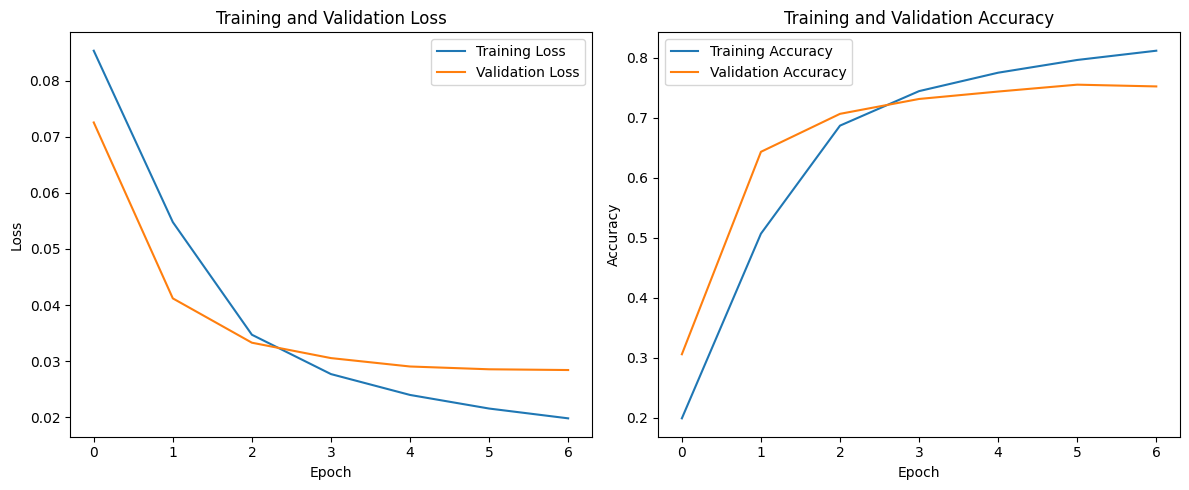

In [285]:
# Extracting training and validation loss and accuracy
loss = hist.history['loss']
val_loss = hist.history['val_loss']
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [286]:
mudel.evaluate(X_test_vect, y_test)

870/870 [==============================] - 3s 3ms/step - loss: 0.0269 - accuracy: 0.7542


[0.02693440206348896, 0.7541531920433044]

In [287]:
ennustused = mudel.predict(X_test_vect)

870/870 [==============================] - 4s 3ms/step


In [288]:
print(ennustused[0])
lävend = 0.375
binaarsed_vasted = (ennustused > lävend).astype(int)
print(binaarsed_vasted[0])
print(y_test[0])

[4.5309346e-03 5.4682127e-06 1.9474817e-03 2.2323964e-04 1.8231123e-05
 1.3281753e-07 2.6593060e-08 1.2404010e-04 1.8539854e-04 8.6173118e-04
 1.1257571e-03 1.0268233e-03 7.9596303e-02 5.9620012e-04 2.5642933e-03
 4.4659773e-05 4.4377390e-03 5.1387721e-03 5.4015927e-05 3.6484078e-02
 2.5366378e-04 1.6168573e-04 1.2488231e-05 2.6429692e-01 2.3972025e-04
 1.5461273e-03 2.5443232e-04 6.4724343e-05 1.9567629e-02 1.5336359e-01
 8.8079221e-05 1.2733764e-04 4.9846654e-05 6.3164654e-05 5.0423474e-05
 4.3918284e-08 2.0227423e-08 9.2436927e-08 1.1075398e-05 3.7631850e-08
 4.1042043e-08 2.0125576e-06 2.0282368e-04 1.1380061e-04 1.5660679e-04
 1.7561208e-04 4.8861755e-03]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [289]:
täpsus = sk.metrics.accuracy_score(y_test, binaarsed_vasted)
print(f"Testimishulga täpsus: {round(täpsus*100, 3)}%")

Testimishulga täpsus: 71.46%
